## 1. Exploration of the dataset and images

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# read in the csv belonging to the images
df = pd.read_csv('train.csv')
df.head()

filename  opacity  diabetic retinopathy  glaucoma  macular edema  \
0  c24a1b14d253.jpg        0                     0         0              0   
1  9ee905a41651.jpg        0                     0         0              0   
2  3f58d128caf6.jpg        0                     0         1              0   
3  4ce6599e7b20.jpg        1                     0         0              0   
4  0def470360e4.jpg        1                     0         0              0   

   macular degeneration  retinal vascular occlusion  normal  
0                     0                           1       0  
1                     0                           1       0  
2                     0                           0       0  
3                     1                           0       0  
4                     1                           0       0

In [3]:
# Rows and Columns of the DataFrame
df.shape

(3435, 8)

In [4]:
# Checking for the types of the variables
df.dtypes

filename                      object
opacity                        int64
diabetic retinopathy           int64
glaucoma                       int64
macular edema                  int64
macular degeneration           int64
retinal vascular occlusion     int64
normal                         int64
dtype: object

In [5]:
# How often does an illness occur in the dataset?
for i in df.columns[1:]:
    print(i, df[i].sum())

opacity 1533
diabetic retinopathy 755
glaucoma 597
macular edema 516
macular degeneration 574
retinal vascular occlusion 440
normal 525


There is an imbalance in the data, that will have to be addressed, so that the learner can pick up all of the illnesses well. 

In [6]:
# make a new columns with all labels
df['labels'] = df.eq(1).apply(lambda x: ', '.join(x[x].index), axis = 1)

In [7]:
df.head()

filename  opacity  diabetic retinopathy  glaucoma  macular edema  \
0  c24a1b14d253.jpg        0                     0         0              0   
1  9ee905a41651.jpg        0                     0         0              0   
2  3f58d128caf6.jpg        0                     0         1              0   
3  4ce6599e7b20.jpg        1                     0         0              0   
4  0def470360e4.jpg        1                     0         0              0   

   macular degeneration  retinal vascular occlusion  normal  \
0                     0                           1       0   
1                     0                           1       0   
2                     0                           0       0   
3                     1                           0       0   
4                     1                           0       0   

                          labels  
0     retinal vascular occlusion  
1     retinal vascular occlusion  
2                       glaucoma  
3  opacity, macular degeneration  
4  opacity, macular degeneration

In [8]:
# Illnesses, that occur together
df.labels.value_counts()

opacity                                                                     671
normal                                                                      525
glaucoma                                                                    327
macular degeneration                                                        299
opacity, macular degeneration                                               212
diabetic retinopathy                                                        212
opacity, diabetic retinopathy                                               186
retinal vascular occlusion                                                  170
diabetic retinopathy, macular edema                                         162
opacity, diabetic retinopathy, macular edema                                154
opacity, glaucoma                                                           140
macular edema, retinal vascular occlusion                                    74
opacity, macular edema, retinal vascular

In [9]:
df[(df.sum(axis=1)==1)].labels.value_counts().sum()

2231

In [10]:
df[(df.sum(axis=1)==2)].labels.value_counts().sum()

916

In [11]:
df[(df.sum(axis=1)==3)].labels.value_counts().sum()

275

In [12]:
df[(df.sum(axis=1)==4)].labels.value_counts().sum()

13

- There are 3435 cases in the dataset
- Of these, 1706 cases have one abnormality and 525 of which are healthy
- There are 916 Cases with 2 Abnormalities
- 275 Cases with 3 Abnormalities
- and 13 Cases with 4 Abnormalities

In [13]:
# Pearson's Correlation
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

opacity                     opacity                       1.000000
diabetic retinopathy        macular edema                 0.418289
normal                      opacity                       0.381328
macular edema               retinal vascular occlusion    0.233828
diabetic retinopathy        normal                        0.225444
                            macular degeneration          0.220781
glaucoma                    diabetic retinopathy          0.208188
normal                      glaucoma                      0.194811
                            macular degeneration          0.190252
macular degeneration        macular edema                 0.183955
normal                      macular edema                 0.178583
diabetic retinopathy        retinal vascular occlusion    0.176092
retinal vascular occlusion  normal                        0.162803
macular degeneration        retinal vascular occlusion    0.155337
glaucoma                    opacity                       0.14

In [14]:
# Have a look at some images
def imag(tar):
    im_dir = r"D:\data\Projects\notebooks\RetinaAI\Preprocessing\train"
    df_tar = df[df.labels == tar]
    plt.figure(figsize=(10, 10))
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        rand = df_tar.sample(n=1).iloc[0,0]
        img = plt.imread(os.path.join(im_dir, rand))
        plt.axis('off')
        plt.title(rand)
        plt.imshow(img) #, cmap='gray'
    print('Abnormality:'+tar.upper())
    plt.tight_layout()

Abnormality:OPACITY


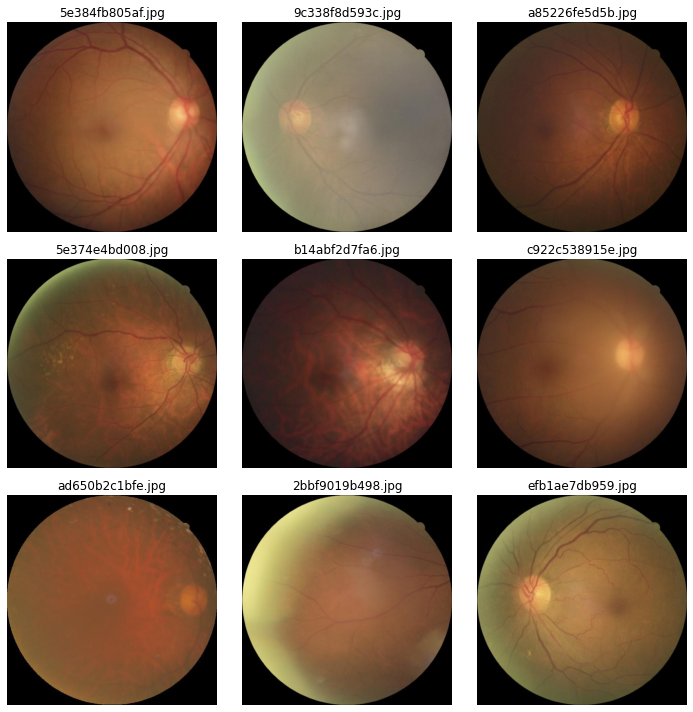

In [15]:
imag('opacity')

Abnormality:RETINAL VASCULAR OCCLUSION


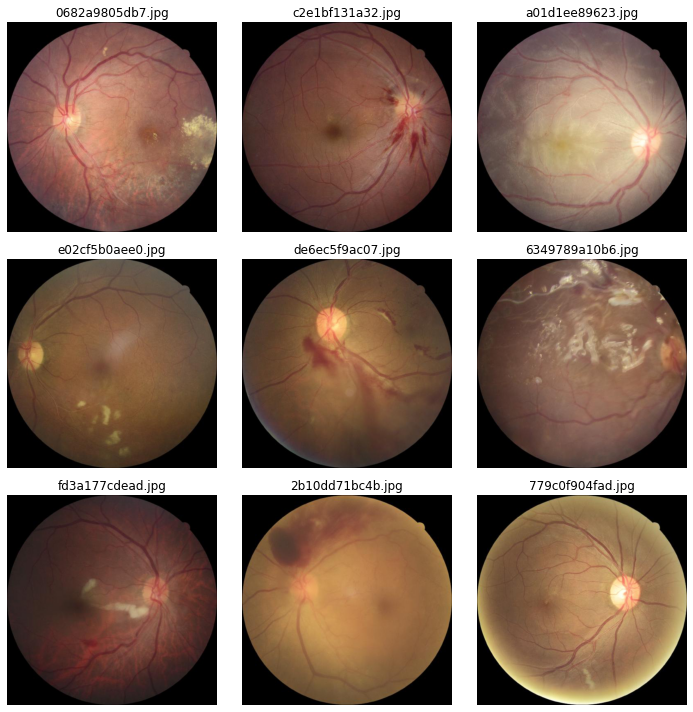

In [16]:
imag('retinal vascular occlusion')

Abnormality:DIABETIC RETINOPATHY


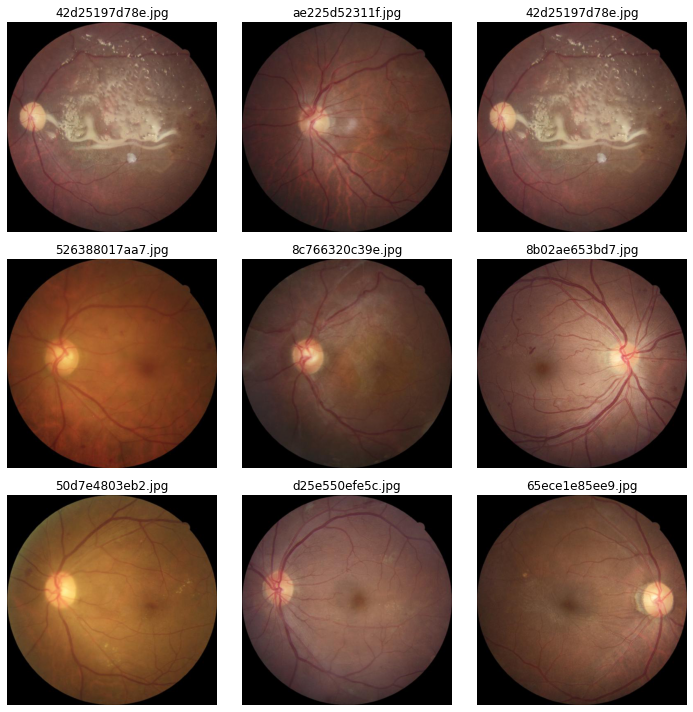

In [17]:
imag('diabetic retinopathy')

Abnormality:MACULAR EDEMA


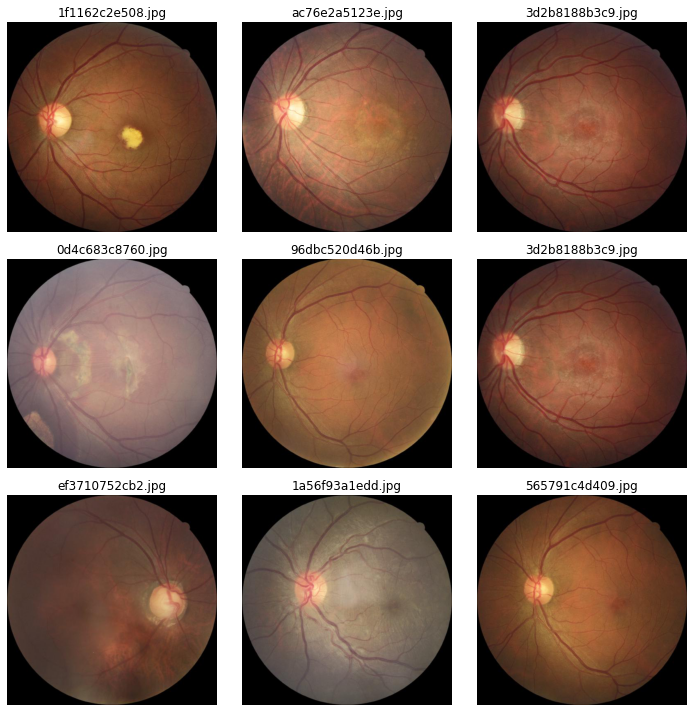

In [18]:
imag('macular edema')

Abnormality:MACULAR DEGENERATION


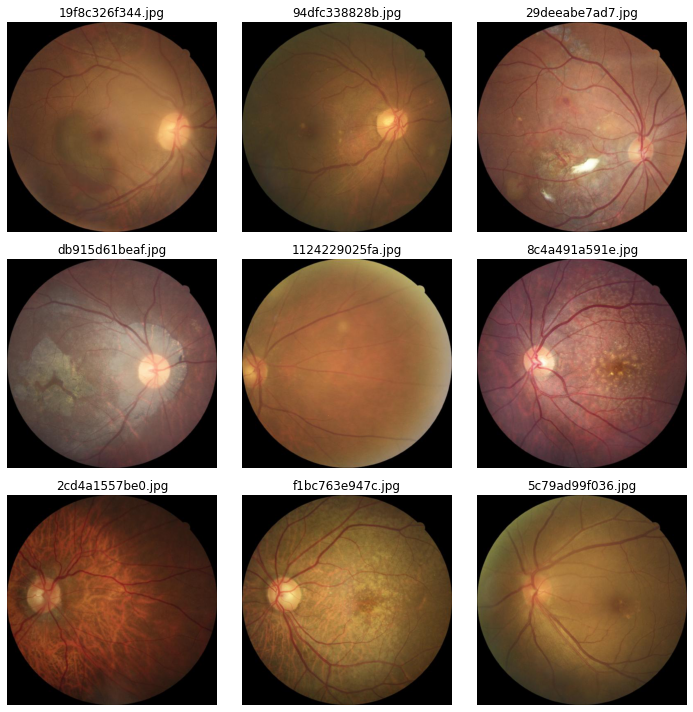

In [19]:
imag('macular degeneration')

Abnormality:GLAUCOMA


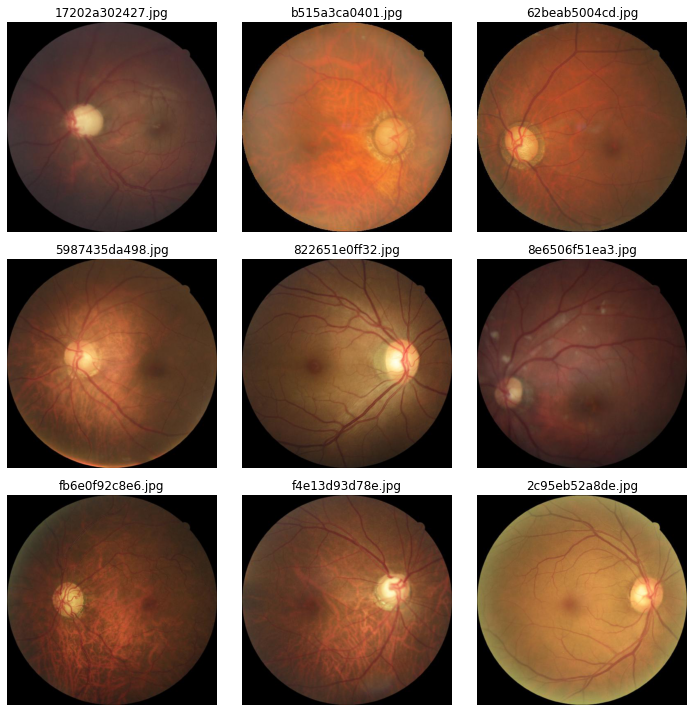

In [20]:
imag('glaucoma')

Abnormality:NORMAL


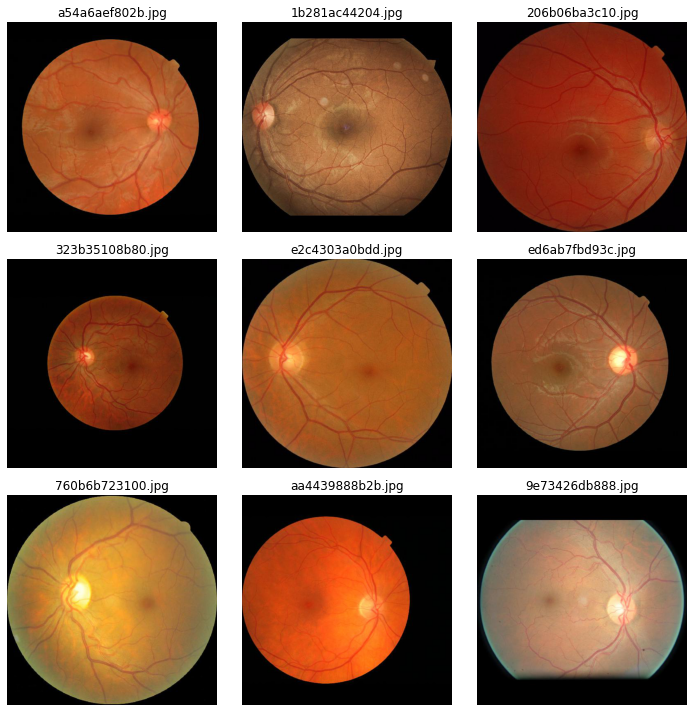

In [24]:
imag('normal')

The images need to be cropped and resized in preprocessing. 

In [22]:
# make a small dataset with only filenames and labels
#df_labels = df[['filename', 'labels']]

In [23]:
# Save datasets to file
#df_labels.to_csv('train_labels.csv', sep=',', encoding='utf-8', index=False)
#df.to_csv('train_new.csv', sep=',', encoding='utf-8', index=False)